# Задание


    1. Взять датасет.
    
    2. Провести EDA
    
    3. Построить зависимость между качеством модели и количеством отобранных признаков. Т.е. надо обучать модель на количестве признаков от одного до максимально возможного.
    
    4. Для отбора признаков использовать следующие подходы:

    корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции
    отбор признаков на основе Information Value (см. статью)
    отбор признаков на основе feature_impotance от алгоритма RandomForest
    жадный отбор признаков по максимальному нарастанию качества модели
    жадное отбрасывание признаков по минимальному падению качества модели



In [1]:
from sklearn.datasets import fetch_covtype
import pandas as pd

In [2]:
#data_ = fetch_covtype(return_X_y=True, as_frame=True)  # df
data_ = fetch_covtype()

In [3]:
df = pd.DataFrame(data_.data, columns=data_.feature_names)

In [4]:
df.head()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.dtypes

Elevation                             float64
Aspect                                float64
Slope                                 float64
Horizontal_Distance_To_Hydrology      float64
Vertical_Distance_To_Hydrology        float64
Horizontal_Distance_To_Roadways       float64
Hillshade_9am                         float64
Hillshade_Noon                        float64
Hillshade_3pm                         float64
Horizontal_Distance_To_Fire_Points    float64
Wilderness_Area_0                     float64
Wilderness_Area_1                     float64
Wilderness_Area_2                     float64
Wilderness_Area_3                     float64
Soil_Type_0                           float64
Soil_Type_1                           float64
Soil_Type_2                           float64
Soil_Type_3                           float64
Soil_Type_4                           float64
Soil_Type_5                           float64
Soil_Type_6                           float64
Soil_Type_7                       

In [6]:
data_.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
print(data_['DESCR'])

.. _covtype_dataset:

Forest covertypes
-----------------

The samples in this dataset correspond to 30Ã—30m patches of forest in the US,
collected for the task of predicting each patch's cover type,
i.e. the dominant species of tree.
There are seven covertypes, making this a multiclass classification problem.
Each sample has 54 features, described on the
`dataset's homepage <https://archive.ics.uci.edu/ml/datasets/Covertype>`__.
Some of the features are boolean indicators,
while others are discrete or continuous measurements.

**Data Set Characteristics:**

    =================   ============
    Classes                        7
    Samples total             581012
    Dimensionality                54
    Features                     int
    =================   ============

:func:`sklearn.datasets.fetch_covtype` will load the covertype dataset;
it returns a dictionary-like 'Bunch' object
with the feature matrix in the ``data`` member
and the target values in ``target``. If optional 

In [8]:
print(data_['data'])

[[2.596e+03 5.100e+01 3.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.590e+03 5.600e+01 2.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.804e+03 1.390e+02 9.000e+00 ... 0.000e+00 0.000e+00 0.000e+00]
 ...
 [2.386e+03 1.590e+02 1.700e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.384e+03 1.700e+02 1.500e+01 ... 0.000e+00 0.000e+00 0.000e+00]
 [2.383e+03 1.650e+02 1.300e+01 ... 0.000e+00 0.000e+00 0.000e+00]]


In [9]:
print(len(data_['data']))
print(len(data_['target']))
print(len(data_['target_names']))
print(len(data_['feature_names']))

581012
581012
1
54


In [10]:
pd.Series(data_['target'])

0         5
1         5
2         2
3         2
4         5
         ..
581007    3
581008    3
581009    3
581010    3
581011    3
Length: 581012, dtype: int32

In [11]:
df.describe()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.044175,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.205483,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [12]:
df.skew()

Elevation                              -0.817596
Aspect                                  0.402628
Slope                                   0.789273
Horizontal_Distance_To_Hydrology        1.140437
Vertical_Distance_To_Hydrology          1.790250
Horizontal_Distance_To_Roadways         0.713679
Hillshade_9am                          -1.181147
Hillshade_Noon                         -1.063056
Hillshade_3pm                          -0.277053
Horizontal_Distance_To_Fire_Points      1.288644
Wilderness_Area_0                       0.205618
Wilderness_Area_1                       4.061595
Wilderness_Area_2                       0.257822
Wilderness_Area_3                       3.575561
Soil_Type_0                            13.736670
Soil_Type_1                             8.615358
Soil_Type_2                            10.838630
Soil_Type_3                             6.625176
Soil_Type_4                            18.995243
Soil_Type_5                             9.240061
Soil_Type_6         

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

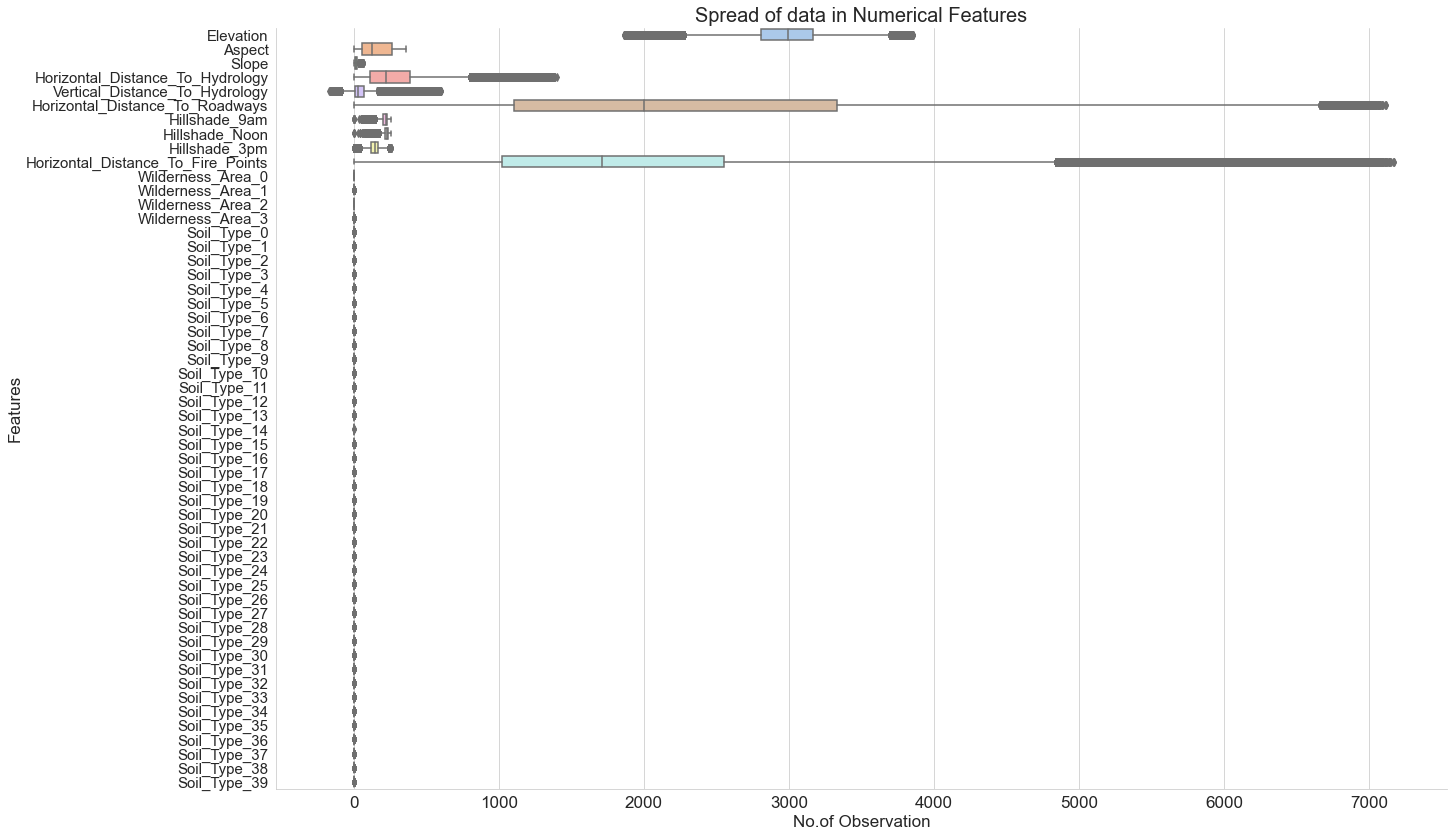

In [14]:



# plot bg
sns.set_style("whitegrid")

#Size of the plot
plt.subplots(figsize=(21, 14))

# setting color of the plot
color = sns.color_palette('pastel')

# Using seaborn to plot it horizontally with 'color'
sns.boxplot(data = df, orient='h', palette=color)

# Uncomment below code to visualize where every single data observation of the features lie in the plot 
#sns.swarmplot(data = num_fea)  #WARNING THIS WILL TAKE LOTS OF TIME DEPENDING ON CPU POWER AND RAM YOU HAVE  !!

# Title of the graph
plt.title('Spread of data in Numerical Features', size = 20)

# Horizontal axis Label
plt.xlabel('No.of Observation', size = 17)
# Vertical axis Label
plt.ylabel('Features', size = 17)

# x-axis label size
plt.xticks(size = 17)
#y-axis label size
plt.yticks(size = 15)

# removing the top and right axes spines, which are not needed
sns.despine()

# display plot
plt.show()

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.kernel_approximation import PolynomialCountSketch
from sklearn.linear_model import LogisticRegression

In [16]:
X, y = fetch_covtype(return_X_y=True, as_frame=True)
pipe = make_pipeline(
    MinMaxScaler(),
    PolynomialCountSketch(degree=2, n_components=300),
    LogisticRegression(max_iter=1000),
)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=5000, test_size=1000, random_state=42
)
pipe.fit(X_train, y_train).score(X_test, y_test)

0.734

###### For comparison, here is the score of a linear baseline for the same data:

In [17]:
linear_baseline = make_pipeline(MinMaxScaler(), LogisticRegression(max_iter=1000))
linear_baseline.fit(X_train, y_train).score(X_test, y_test)

0.727

In [18]:
data_.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

###### корреляция признаков (на основе матрицы корреляции) и отбор по величине корреляции

In [19]:
df.corr()

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,...,Soil_Type_30,Soil_Type_31,Soil_Type_32,Soil_Type_33,Soil_Type_34,Soil_Type_35,Soil_Type_36,Soil_Type_37,Soil_Type_38,Soil_Type_39
Elevation,1.000000,0.015735,-0.242697,0.306229,0.093306,0.365559,0.112179,0.205887,0.059148,0.148022,...,0.070405,0.167077,0.070633,0.011731,0.083005,0.021107,0.035433,0.217179,0.193595,0.212612
Aspect,0.015735,1.000000,0.078728,0.017376,0.070305,0.025121,-0.579273,0.336103,0.646944,-0.109172,...,0.001763,0.056233,0.019163,0.010861,-0.021991,0.002281,-0.020398,0.017706,0.008294,-0.005866
Slope,-0.242697,0.078728,1.000000,-0.010607,0.274976,-0.215914,-0.327199,-0.526911,-0.175854,-0.185662,...,-0.034610,-0.133504,0.208942,-0.011002,-0.022228,0.002918,0.007848,-0.072208,0.093602,0.025637
Horizontal_Distance_To_Hydrology,0.306229,0.017376,-0.010607,1.000000,0.606236,0.072030,-0.027088,0.046790,0.052330,0.051874,...,0.073658,0.127217,0.101195,0.070268,-0.005231,0.033421,-0.006802,0.043031,0.031922,0.147020
Vertical_Distance_To_Hydrology,0.093306,0.070305,0.274976,0.606236,1.000000,-0.046372,-0.166333,-0.110957,0.034902,-0.069913,...,0.033609,0.039762,0.167091,0.060274,-0.006092,0.012955,-0.007520,-0.008629,0.043859,0.179006
Horizontal_Distance_To_Roadways,0.365559,0.025121,-0.215914,0.072030,-0.046372,1.000000,0.034349,0.189461,0.106119,0.331580,...,-0.058840,-0.089019,-0.082779,0.006390,-0.003000,0.007550,0.016313,0.079778,0.033762,0.016052
Hillshade_9am,0.112179,-0.579273,-0.327199,-0.027088,-0.166333,0.034349,1.000000,0.010037,-0.780296,0.132669,...,-0.035114,0.006494,-0.064381,0.007154,0.027870,0.007865,0.010332,0.015108,-0.029620,-0.000016
Hillshade_Noon,0.205887,0.336103,-0.526911,0.046790,-0.110957,0.189461,0.010037,1.000000,0.594274,0.057329,...,-0.000095,0.125395,-0.086164,0.043061,0.005863,0.016239,-0.022707,0.042952,-0.071961,-0.040176
Hillshade_3pm,0.059148,0.646944,-0.175854,0.052330,0.034902,0.106119,-0.780296,0.594274,1.000000,-0.047981,...,0.040475,0.083066,-0.024393,0.017757,-0.016482,0.001330,-0.022064,0.022187,-0.029040,-0.024254
Horizontal_Distance_To_Fire_Points,0.148022,-0.109172,-0.185662,0.051874,-0.069913,0.331580,0.132669,0.057329,-0.047981,1.000000,...,-0.066258,-0.089977,-0.059067,-0.035067,-0.000081,-0.010595,0.004180,-0.019740,-0.003301,0.008915


In [20]:
corrMatrix = df.corr()

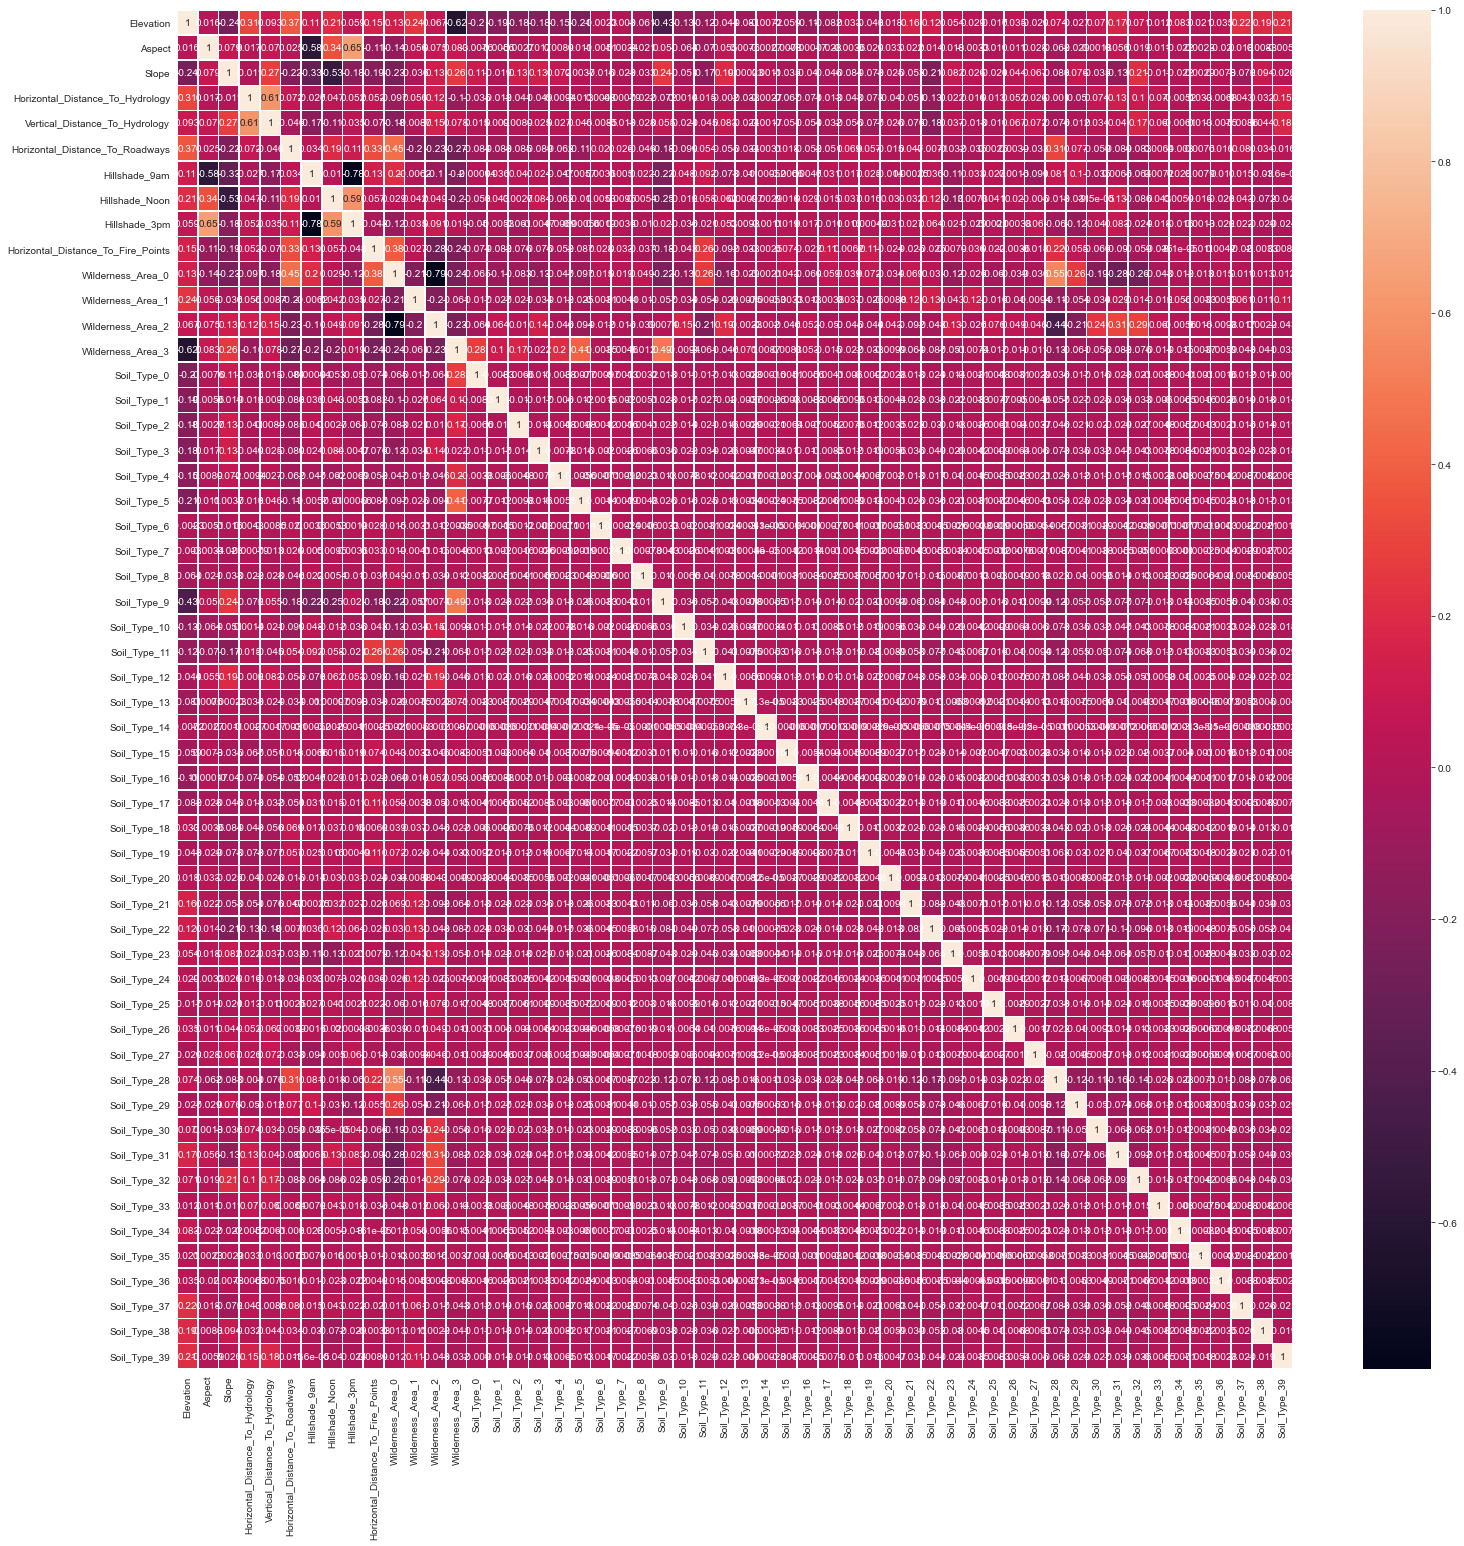

In [21]:
fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(corrMatrix, annot=True, linewidths=.5, ax=ax)
plt.show()

In [22]:
#sns.pairplot(df)

###### отбор признаков на основе Information Value

In [23]:
import numpy as np



In [24]:
# Calculate information value
def calc_iv(df, feature, target, pr=0):

    lst = []

    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append([feature, val, df[df[feature] == val].count()[feature], df[(df[feature] == val) & (df[target] == 1)].count()[feature]])

    data = pd.DataFrame(lst, columns=['Variable', 'Value', 'All', 'Bad'])
    data = data[data['Bad'] > 0]

    data['Share'] = data['All'] / data['All'].sum()
    data['Bad Rate'] = data['Bad'] / data['All']
    data['Distribution Good'] = (data['All'] - data['Bad']) / (data['All'].sum() - data['Bad'].sum())
    data['Distribution Bad'] = data['Bad'] / data['Bad'].sum()
    data['WoE'] = np.log(data['Distribution Good'] / data['Distribution Bad'])
    data['IV'] = (data['WoE'] * (data['Distribution Good'] - data['Distribution Bad'])).sum()

    data = data.sort_values(by=['Variable', 'Value'], ascending=True)

    if pr == 1:
        print(data)

    return data['IV'].values[0]

In [25]:
calc_iv(df,'Elevation', 'Slope', pr=0)

0.4618924573992109

In [26]:
#calc_iv(df,'Elevation', 'Horizontal_Distance_To_Hydrology', pr=0)

In [27]:
calc_iv(df,'Elevation', 'Vertical_Distance_To_Hydrology', pr=0)

0.3705322008205723

In [28]:
#calc_iv(df,'Slope', 'Hillshade_9am', pr=0)

In [29]:
calc_iv(df,'Slope', 'Hillshade_3pm', pr=0)

0.4341367889844977

###### отбор признаков на основе feature_impotance от алгоритма RandomForest

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [31]:
y = data_.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=12)

In [32]:
rf = RandomForestRegressor(n_estimators=10)



In [33]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10)

In [34]:
rf.feature_importances_

array([3.33929654e-01, 2.89259416e-02, 1.62872806e-02, 4.75924226e-02,
       4.35021164e-02, 1.29120585e-01, 2.70771810e-02, 2.40634654e-02,
       2.45206651e-02, 1.44217225e-01, 1.80582654e-02, 5.81618517e-03,
       4.07330522e-02, 1.27764665e-03, 3.71515424e-04, 2.82688348e-03,
       6.96926020e-04, 3.04457784e-03, 5.36797758e-04, 9.92277562e-04,
       9.36065794e-08, 7.42928856e-06, 2.81805583e-05, 5.28520814e-03,
       2.01129790e-03, 1.88483831e-04, 2.56759356e-03, 7.05583064e-04,
       4.14025998e-06, 4.56523612e-04, 2.76232792e-03, 1.23829259e-06,
       2.94092783e-04, 1.20978417e-03, 1.55520433e-04, 1.93335219e-03,
       3.29587999e-03, 2.62686014e-03, 6.02336425e-05, 1.45940696e-04,
       4.90406218e-04, 5.72769510e-05, 2.24148727e-03, 3.01771857e-03,
       3.79491374e-03, 3.44625359e-02, 4.61913461e-03, 6.14148274e-04,
       5.46798256e-03, 5.54667850e-06, 1.70001194e-03, 8.36091129e-03,
       1.46060927e-02, 3.23140462e-03])

In [35]:
from matplotlib.pyplot import figure



<BarContainer object of 54 artists>

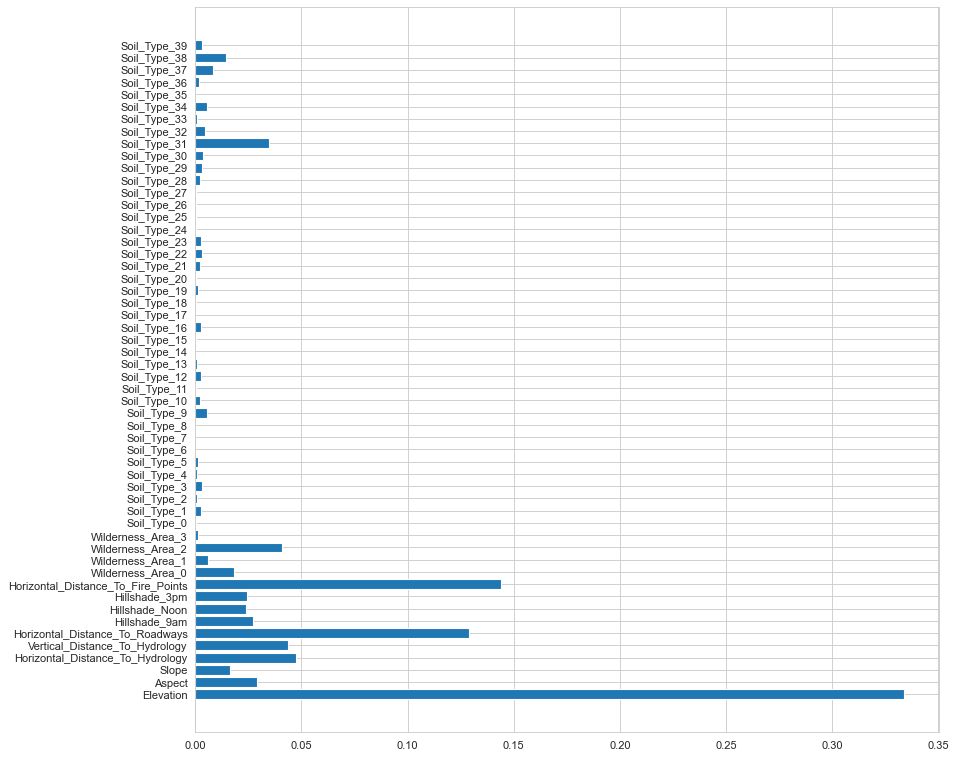

In [36]:
figure(figsize=(12, 12), dpi=80)
plt.barh(data_.feature_names, rf.feature_importances_)

In [37]:
from sklearn.ensemble import ExtraTreesClassifier

In [38]:
df_2 = df[['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
          'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1',
          'Wilderness_Area_2', 'Wilderness_Area_3']] 

In [39]:
array = df_2.values

In [40]:
df_2

,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,Horizontal_Distance_To_Fire_Points,Wilderness_Area_0,Wilderness_Area_1,Wilderness_Area_2,Wilderness_Area_3
0,2596.0,51.0,3.0,258.0,0.0,510.0,221.0,232.0,148.0,6279.0,1.0,0.0,0.0,0.0
1,2590.0,56.0,2.0,212.0,-6.0,390.0,220.0,235.0,151.0,6225.0,1.0,0.0,0.0,0.0
2,2804.0,139.0,9.0,268.0,65.0,3180.0,234.0,238.0,135.0,6121.0,1.0,0.0,0.0,0.0
3,2785.0,155.0,18.0,242.0,118.0,3090.0,238.0,238.0,122.0,6211.0,1.0,0.0,0.0,0.0
4,2595.0,45.0,2.0,153.0,-1.0,391.0,220.0,234.0,150.0,6172.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581007,2396.0,153.0,20.0,85.0,17.0,108.0,240.0,237.0,118.0,837.0,0.0,0.0,1.0,0.0
581008,2391.0,152.0,19.0,67.0,12.0,95.0,240.0,237.0,119.0,845.0,0.0,0.0,1.0,0.0
581009,2386.0,159.0,17.0,60.0,7.0,90.0,236.0,241.0,130.0,854.0,0.0,0.0,1.0,0.0
581010,2384.0,170.0,15.0,60.0,5.0,90.0,230.0,245.0,143.0,864.0,0.0,0.0,1.0,0.0


In [41]:
X = array[:,:8] # dataframe --> массив numpy
Y = array[:,8]


In [42]:
names = ['Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology', 'Vertical_Distance_To_Hydrology', 
           'Horizontal_Distance_To_Roadways', 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
          'Horizontal_Distance_To_Fire_Points', 'Wilderness_Area_0', 'Wilderness_Area_1',
          'Wilderness_Area_2', 'Wilderness_Area_3']

###### жадный отбор признаков по максимальному нарастанию качества модели

###### жадное отбрасывание признаков по минимальному падению качества модели

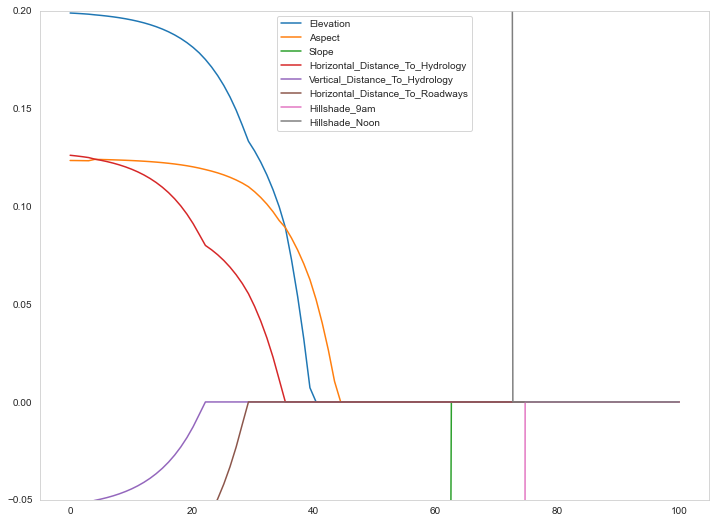

In [44]:
from sklearn.linear_model import  Lasso # линейная модель с L1-регуляризацией
from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings('ignore')

X_sc = StandardScaler().fit_transform(X) # преобразование данных
lg_l,pred_l = [], []

list_l=list(2**np.linspace(-10,10,100))

# строим n-ое кол-во моделей Лассо, меняя коэффициент регуляризации, сохраняя модель и коэффициенты
for i in range(len(list_l)):
    m_l = Lasso(alpha=list_l[i]).fit(X_sc, Y)
    lg_l.append(m_l)
    pred_l.append(m_l.coef_)

# рисуем отмасштабированные признаки на одном графике
plt.figure(figsize=(12,9))
x_l = np.linspace(0,len(pred_l),len(pred_l))
for i in np.vstack(pred_l).T:
    plt.plot(x_l,np.sign(i)*np.abs(i)) 
plt.ylim(-0.05,0.2)  
plt.legend(names)      
plt.grid()

In [62]:
from sklearn.decomposition import PCA, IncrementalPCA

In [58]:
pca = PCA(n_components=2)

In [59]:
pca.fit(X)

PCA(n_components=2)

In [60]:
print(pca.explained_variance_ratio_)

[0.94961544 0.02983304]


In [61]:
print(pca.singular_values_)

[1191230.24930804  211140.01571214]


In [71]:
pca = PCA(n_components = 1)
XPCAreduced = pca.fit_transform(X.T)
pca.fit(X)
Xnew = pca.singular_values_

In [72]:
XPCAreduced

array([[1566000.54461799],
       [-501603.0058411 ],
       [-604846.26525399],
       [-415319.19267528],
       [-581815.37775543],
       [1449515.90143424],
       [-460285.06173958],
       [-451647.54278685]])

In [73]:
for xn, x_pca in zip(Xnew, XPCAreduced):
    print(np.abs(xn), '-', np.abs(x_pca[0]), '=', np.abs(xn) - np.abs(x_pca[0]))

1191230.2493080436 - 1566000.5446179933 = -374770.29530994967


In [74]:
print(pca.explained_variance_ratio_)

[0.94961544]
